In [ ]:
import os
import numpy as np
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from geo_utils import table_dict, og_table_dict
from sqlalchemy import create_engine, text
from PIL import Image

In [2]:
import geopandas as gpd
from rasterio import features
from rasterio.transform import from_bounds

In [3]:
load_dotenv('./conf.env')
conn_str = os.getenv('CONN_STR')
engine = create_engine(conn_str)

In [70]:
time = datetime.strptime('2022_05_26T17_50_14_786', '%Y_%m_%dT%H_%M_%S_%f')
table = 'uniform_granule'
query = f"SELECT id, shape FROM {table} WHERE time='{time}'"
per_class_maps = dict()
width, height = 3454, 3454 

id: 4060


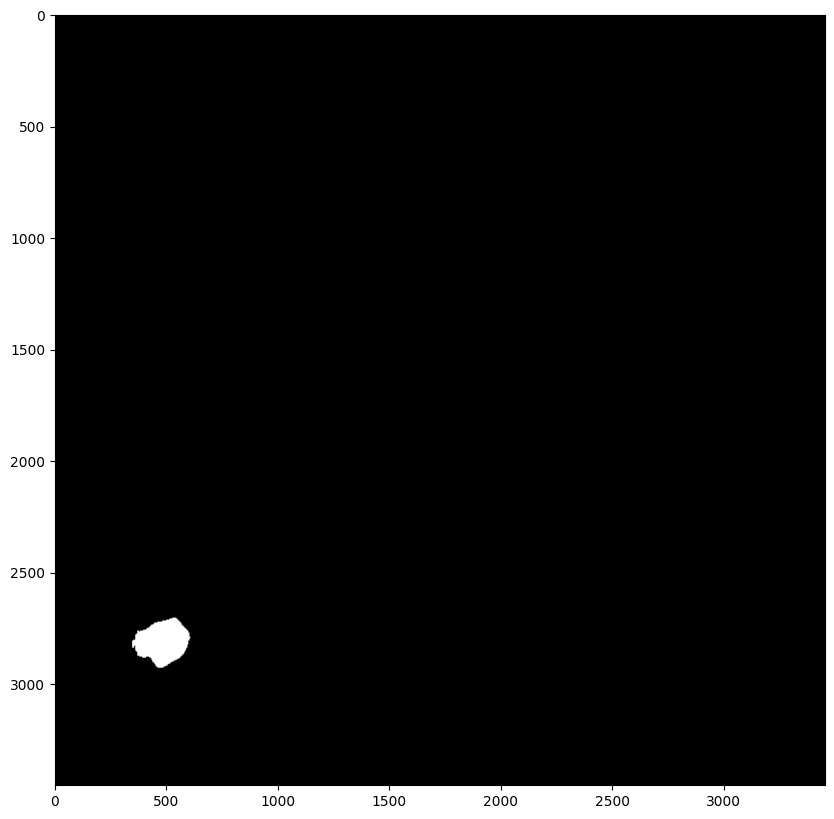

In [71]:
gdf = gpd.read_postgis(query, engine, geom_col="shape")
print('id:', gdf.iloc[0].id)
gdf = gdf.to_crs("EPSG:4326")
minx, miny, maxx, maxy = gdf.geometry.total_bounds
polygon = gdf.geometry.iloc[0]
raster_width = raster_height = 3454
transform = from_bounds(0, 0, raster_width, raster_height, raster_width, raster_height)
raster = features.rasterize(
    [(polygon, 1)],  # Polygon with a value of 1
    out_shape=(raster_height, raster_width),
    transform=transform,
    fill=0,  # Background value
    dtype='uint8'
)
img = Image.fromarray(raster)
img.save('image.png')
plt.figure(figsize=(10, 10))
plt.imshow(raster, cmap="gray")
plt.show()

In [72]:
time = datetime.strptime('2022_05_26T17_50_20_880', '%Y_%m_%dT%H_%M_%S_%f')

In [83]:
query = '''
WITH current_object AS (
    SELECT id, shape
    FROM public.g1
    WHERE id = thisid
),
next_objects AS (
    SELECT 
        id, 
        shape, 
        'g1' AS table_name 
    FROM public.g1
    WHERE time = 'timestamp'
    UNION ALL
    SELECT 
        id, 
        shape, 
        'g2' AS table_name 
    FROM public.g2
    WHERE time = 'timestamp'
    UNION ALL
    SELECT
        id, 
        shape, 
        'g3' AS table_name 
    FROM public.g3
    WHERE time = 'timestamp'
    UNION ALL
    SELECT 
        id, 
        shape, 
        'g4' AS table_name 
    FROM public.g4
    WHERE time = 'timestamp'
)
SELECT 
    next_objects.id AS next_id,
    ST_Area(ST_Intersection(current_object.shape, next_objects.shape)) /
    ST_Area(ST_Union(current_object.shape, next_objects.shape)) AS iou,
    next_objects.table_name
FROM current_object, next_objects
WHERE ST_Intersects(current_object.shape, next_objects.shape);

'''

In [84]:
query = query.replace('thisid', '4060').replace('g1', 'uniform_granule').replace('g2', 'granule_with_lane').replace('g3', 'granule_with_dot').replace('g4', 'complex_granule').replace('timestamp', str(time))

In [85]:
print(query)


WITH current_object AS (
    SELECT id, shape
    FROM public.uniform_granule
    WHERE id = 4060
),
next_objects AS (
    SELECT 
        id, 
        shape, 
        'uniform_granule' AS table_name 
    FROM public.uniform_granule
    WHERE time = '2022-05-26 17:50:20.880000'
    UNION ALL
    SELECT 
        id, 
        shape, 
        'granule_with_lane' AS table_name 
    FROM public.granule_with_lane
    WHERE time = '2022-05-26 17:50:20.880000'
    UNION ALL
    SELECT
        id, 
        shape, 
        'granule_with_dot' AS table_name 
    FROM public.granule_with_dot
    WHERE time = '2022-05-26 17:50:20.880000'
    UNION ALL
    SELECT 
        id, 
        shape, 
        'complex_granule' AS table_name 
    FROM public.complex_granule
    WHERE time = '2022-05-26 17:50:20.880000'
)
SELECT 
    next_objects.id AS next_id,
    ST_Area(ST_Intersection(current_object.shape, next_objects.shape)) /
    ST_Area(ST_Union(current_object.shape, next_objects.shape)) AS iou,
    ne

In [86]:
with engine.connect() as conn:
    results = conn.execute(text(query))

In [87]:
rows = results.fetchall()

In [88]:
len(rows)

2

In [89]:
for row in rows:
    print(row)

(2128, 0.9505634783505686, 'uniform_granule')
(12434, 0.024708203879418928, 'complex_granule')


In [90]:
probabilities = {
    'complex_granule': 1,
    'uniform_granule': 3,
    'granule_with_dot': 1,
    'granule_with_lane': 1,
}

In [91]:
scores = np.array([r[1] * probabilities[r[2]] for r in rows])

In [93]:
rows[np.argmax(scores)]

(2128, 0.9505634783505686, 'uniform_granule')

id: 2128


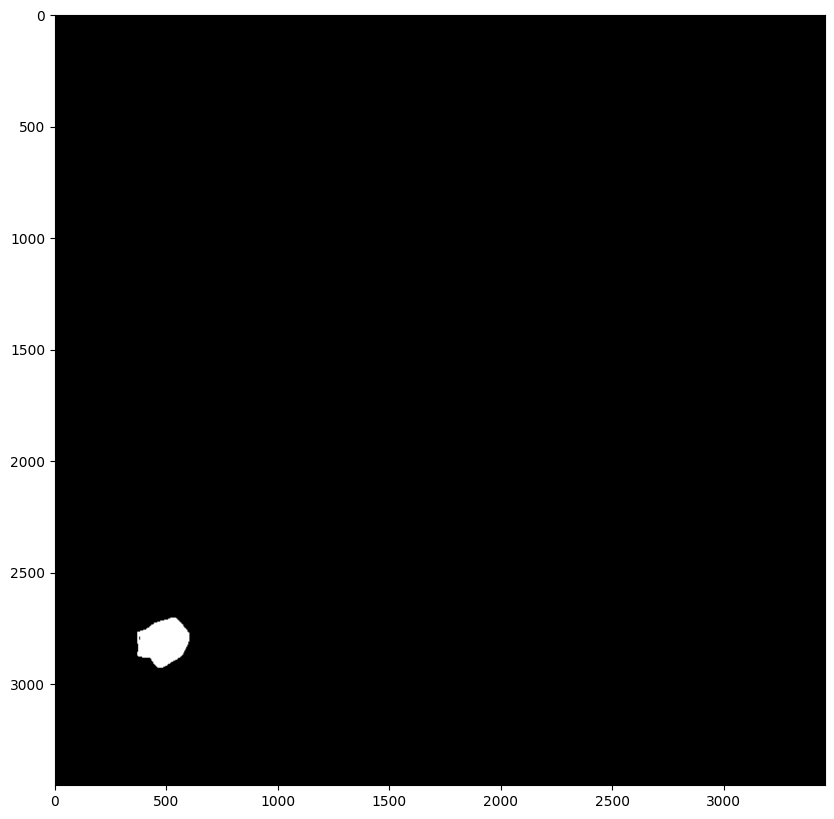

In [95]:
query = f"SELECT id, shape FROM {table} WHERE id=2128"
per_class_maps = dict()
width, height = 3454, 3454
gdf = gpd.read_postgis(query, engine, geom_col="shape")
print('id:', gdf.iloc[0].id)
gdf = gdf.to_crs("EPSG:4326")
minx, miny, maxx, maxy = gdf.geometry.total_bounds
polygon = gdf.geometry.iloc[0]
raster_width = raster_height = 3454
transform = from_bounds(0, 0, raster_width, raster_height, raster_width, raster_height)
raster = features.rasterize(
    [(polygon, 1)],  # Polygon with a value of 1
    out_shape=(raster_height, raster_width),
    transform=transform,
    fill=0,  # Background value
    dtype='uint8'
)
img = Image.fromarray(raster)
img.save('image.png')
plt.figure(figsize=(10, 10))
plt.imshow(raster, cmap="gray")
plt.show()